<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_6_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,1.115679e+06,1.115855e+06,-3.292801e+06,4.408656e+06
1,0.0,1.0,62.749262,51.928208,38.231461,8.643432e+05,8.645062e+05,-3.717032e+06,4.581538e+06
2,0.0,2.0,85.898120,34.418029,91.090209,-3.919421e+05,-3.917207e+05,4.349390e+06,-4.741110e+06
3,0.0,3.0,55.137433,57.449110,57.729812,-4.333773e+06,-4.333593e+06,-9.421181e+05,-3.391475e+06
4,0.0,4.0,41.225045,69.253238,69.731805,4.318150e+06,4.318340e+06,6.808086e+05,3.637532e+06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,3.159841e+06,3.160026e+06,3.930537e+06,-7.705108e+05
19996,999.0,16.0,92.663682,58.512599,35.091714,3.703651e+05,3.705614e+05,1.147181e+06,-7.766194e+05
19997,999.0,17.0,63.062248,86.565478,27.853802,1.632633e+07,1.632652e+07,4.038539e+06,1.228798e+07
19998,999.0,18.0,47.655607,57.944117,86.192826,1.087113e+05,1.089131e+05,-5.519967e+04,1.641128e+05


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,1.115679e+06,1.115855e+06,-3.292801e+06,4.408656e+06
1,0.0,1.0,62.749262,51.928208,38.231461,8.643432e+05,8.645062e+05,-3.717032e+06,4.581538e+06
2,0.0,2.0,85.898120,34.418029,91.090209,-3.919421e+05,-3.917207e+05,4.349390e+06,-4.741110e+06
3,0.0,3.0,55.137433,57.449110,57.729812,-4.333773e+06,-4.333593e+06,-9.421181e+05,-3.391475e+06
4,0.0,4.0,41.225045,69.253238,69.731805,4.318150e+06,4.318340e+06,6.808086e+05,3.637532e+06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,3.159841e+06,3.160026e+06,3.930537e+06,-7.705108e+05
19996,999.0,16.0,92.663682,58.512599,35.091714,3.703651e+05,3.705614e+05,1.147181e+06,-7.766194e+05
19997,999.0,17.0,63.062248,86.565478,27.853802,1.632633e+07,1.632652e+07,4.038539e+06,1.228798e+07
19998,999.0,18.0,47.655607,57.944117,86.192826,1.087113e+05,1.089131e+05,-5.519967e+04,1.641128e+05


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    73.285575  53.477804  ... -3.292801e+06  4.408656e+06
      1.0    62.749262  51.928208  ... -3.717032e+06  4.581538e+06
      2.0    85.898120  34.418029  ...  4.349390e+06 -4.741110e+06
      3.0    55.137433  57.449110  ... -9.421181e+05 -3.391475e+06
      4.0    41.225045  69.253238  ...  6.808086e+05  3.637532e+06
...                ...        ...  ...           ...           ...
999.0 15.0   23.294746  92.518305  ...  3.930537e+06 -7.705108e+05
      16.0   92.663682  58.512599  ...  1.147181e+06 -7.766194e+05
      17.0   63.062248  86.565478  ...  4.038539e+06  1.228798e+07
      18.0   47.655607  57.944117  ... -5.519967e+04  1.641128e+05
      19.0   99.921349  36.147862  ... -1.361317e+06  2.186616e+06

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    73.285575  53.477804  ... -3.292801e+06  4.408656e+06
      1.0    62.749262  51.928208  ... -3.717032e+06  4.581538e+06
      2.0    85.898120  34.418029  ...  4.349390e+06 -4.741110e+06
      3.0    55.137433  57.449110  ... -9.421181e+05 -3.391475e+06
      4.0    41.225045  69.253238  ...  6.808086e+05  3.637532e+06
...                ...        ...  ...           ...           ...
999.0 15.0   23.294746  92.518305  ...  3.930537e+06 -7.705108e+05
      16.0   92.663682  58.512599  ...  1.147181e+06 -7.766194e+05
      17.0   63.062248  86.565478  ...  4.038539e+06  1.228798e+07
      18.0   47.655607  57.944117  ... -5.519967e+04  1.641128e+05
      19.0   99.921349  36.147862  ... -1.361317e+06  2.186616e+06

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.285575,53.477804,39.023712,1.115679e+06,1.115855e+06,-3.292801e+06,4.408656e+06
1,0.0,1.0,62.749262,51.928208,38.231461,8.643432e+05,8.645062e+05,-3.717032e+06,4.581538e+06
2,0.0,2.0,85.898120,34.418029,91.090209,-3.919421e+05,-3.917207e+05,4.349390e+06,-4.741110e+06
3,0.0,3.0,55.137433,57.449110,57.729812,-4.333773e+06,-4.333593e+06,-9.421181e+05,-3.391475e+06
4,0.0,4.0,41.225045,69.253238,69.731805,4.318150e+06,4.318340e+06,6.808086e+05,3.637532e+06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,3.159841e+06,3.160026e+06,3.930537e+06,-7.705108e+05
19996,999.0,16.0,92.663682,58.512599,35.091714,3.703651e+05,3.705614e+05,1.147181e+06,-7.766194e+05
19997,999.0,17.0,63.062248,86.565478,27.853802,1.632633e+07,1.632652e+07,4.038539e+06,1.228798e+07
19998,999.0,18.0,47.655607,57.944117,86.192826,1.087113e+05,1.089131e+05,-5.519967e+04,1.641128e+05


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    73.285575  53.477804  ... -3.292801e+06  4.408656e+06
      1.0    62.749262  51.928208  ... -3.717032e+06  4.581538e+06
      2.0    85.898120  34.418029  ...  4.349390e+06 -4.741110e+06
      3.0    55.137433  57.449110  ... -9.421181e+05 -3.391475e+06
      4.0    41.225045  69.253238  ...  6.808086e+05  3.637532e+06
...                ...        ...  ...           ...           ...
999.0 15.0   23.294746  92.518305  ...  3.930537e+06 -7.705108e+05
      16.0   92.663682  58.512599  ...  1.147181e+06 -7.766194e+05
      17.0   63.062248  86.565478  ...  4.038539e+06  1.228798e+07
      18.0   47.655607  57.944117  ... -5.519967e+04  1.641128e+05
      19.0   99.921349  36.147862  ... -1.361317e+06  2.186616e+06

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

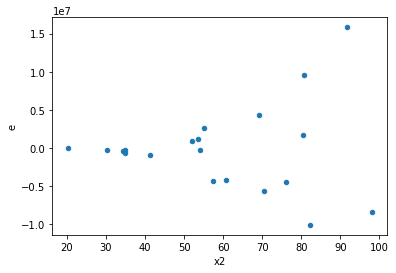

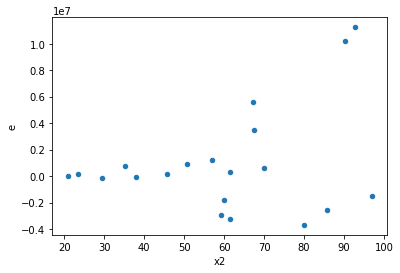

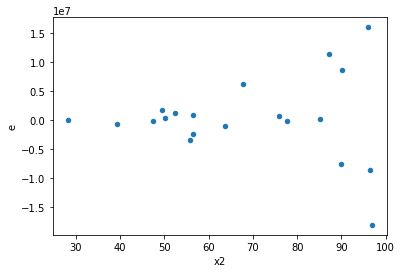

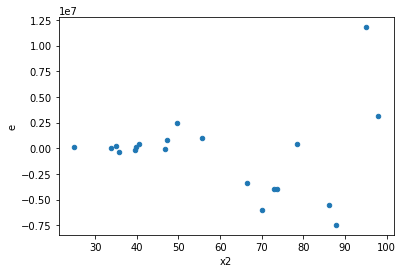

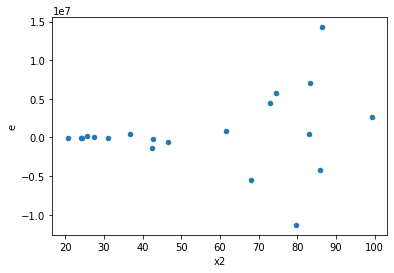

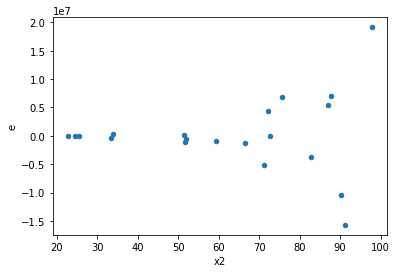

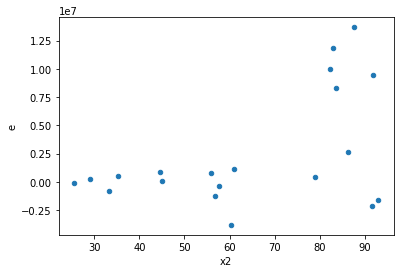

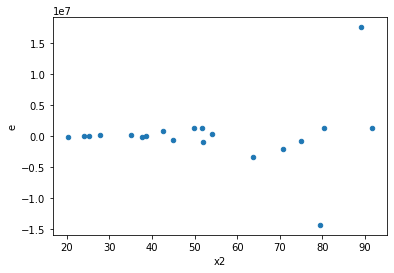

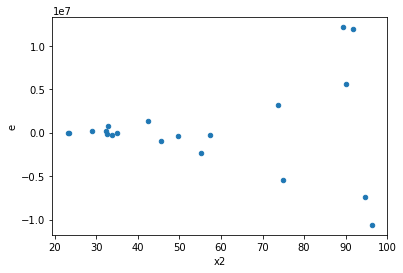

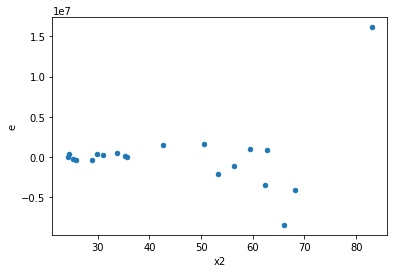

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,40527420046059.76,864766557112.6694,10131855011514.94,216191639278.16736,46.86515651272981,0.0006701758796114898,0.9996649120601943,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,113755428996357.58,366709041285.5854,28438857249089.395,91677260321.39635,310.20622943345217,6.337402387979196e-06,0.999996831298806,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,721695657460811.1,14403816594673.422,180423914365202.78,3600954148668.3555,50.104474235508974,0.0005697902490948703,0.9997151048754526,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,170640018197268.16,204792907776.51053,42660004549317.04,51198226944.12763,833.2320686783096,5.398257820754537e-07,0.999999730087109,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,300178049444205.7,483932334119.36255,75044512361051.42,120983083529.84064,620.2893013761019,1.1273136828471308e-06,0.9999994363431586,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,833600869599057.5,101677898180.602,208400217399764.38,25419474545.1505,8198.44710124123,1.7844756783347293e-09,0.9999999991077622,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,137652082562454.28,3571584706481.002,34413020640613.57,892896176620.2505,38.54089819364234,0.0010753302319648217,0.9994623348840176,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,377367987343538.8,264489833243.84222,94341996835884.7,66122458310.960556,1426.7769112910678,1.40945742632681e-07,0.9999999295271287,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,475181365134498.06,476338246362.1018,118795341283624.52,119084561590.52545,997.5713030888468,3.444411145192561e-07,0.9999998277794427,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,40527420046059.76,864766557112.6694,10131855011514.94,216191639278.16736,46.86515651272981,0.0006701758796114898,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,113755428996357.58,366709041285.5854,28438857249089.395,91677260321.39635,310.20622943345217,6.337402387979196e-06,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,721695657460811.1,14403816594673.422,180423914365202.78,3600954148668.3555,50.104474235508974,0.0005697902490948703,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,170640018197268.16,204792907776.51053,42660004549317.04,51198226944.12763,833.2320686783096,5.398257820754537e-07,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,300178049444205.7,483932334119.36255,75044512361051.42,120983083529.84064,620.2893013761019,1.1273136828471308e-06,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,833600869599057.5,101677898180.602,208400217399764.38,25419474545.1505,8198.44710124123,1.7844756783347293e-09,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,137652082562454.28,3571584706481.002,34413020640613.57,892896176620.2505,38.54089819364234,0.0010753302319648217,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,377367987343538.8,264489833243.84222,94341996835884.7,66122458310.960556,1426.7769112910678,1.40945742632681e-07,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,475181365134498.06,476338246362.1018,118795341283624.52,119084561590.52545,997.5713030888468,3.444411145192561e-07,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    942
Reject001=1 : Homoscedasticity       58
Name: Result_test, dtype: int64